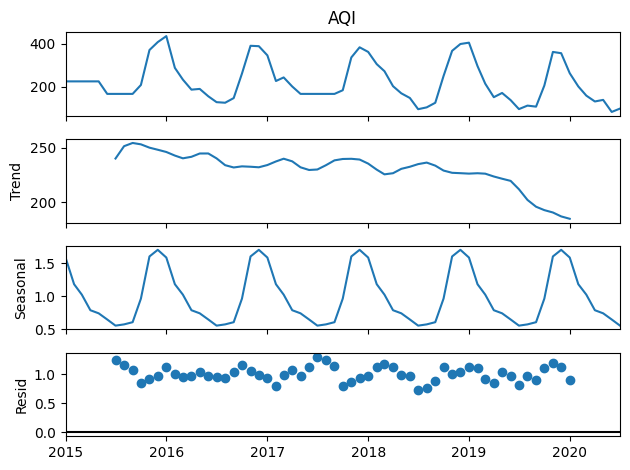

In [25]:
import pandas as pd
c = pd.read_csv('patna.csv')
c['date'] = pd.to_datetime(c['date'])
c.set_index('date', inplace=True)
from statsmodels.tsa.seasonal import seasonal_decompose
c_AQI = c['AQI']
result = seasonal_decompose(c_AQI, model='multiplicative')
result.plot();

In [26]:
!pip install pmdarima
import pmdarima as pm

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima;
c_AQI = c['AQI']
auto_arima(y=c_AQI,start_p=0,start_P=0,start_q=0,start_Q=0,seasonal=True, m=12)
train = c_AQI[:41] #from 2015-2018
test = c_AQI[23:54]# july 2018-june 2019

In [38]:
model=SARIMAX(train,order=(1,0,0),seasonal_order=(1,0,1,12),)
results=model.fit()
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                  AQI   No. Observations:                   41
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -215.870
Date:                              Mon, 29 Jan 2024   AIC                            439.740
Time:                                      14:57:11   BIC                            446.594
Sample:                                  01-01-2015   HQIC                           442.236
                                       - 05-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9132      0.056     16.400      0.000       0.804       1.022
ar.S.L12       0.9990      0.100      9.992      0.000       0.803       1.195
ma.S.L12      -0.9311      3.354     -0.278      0.781      -7.504       5.642
sigma2      1150.0028   3656.581      0.315      0.753   -6016.765    8316.770
===================================================================================
Ljung-Box (L1) (Q):                   2.13   Jarque-Bera (JB):                 2.65
Prob(Q):                              0.14   Prob(JB):                         0.27
Heteroskedasticity (H):               0.32   Skew:                             0.01
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: title={'center': 'chennai Prediction data'}, xlabel='date'>

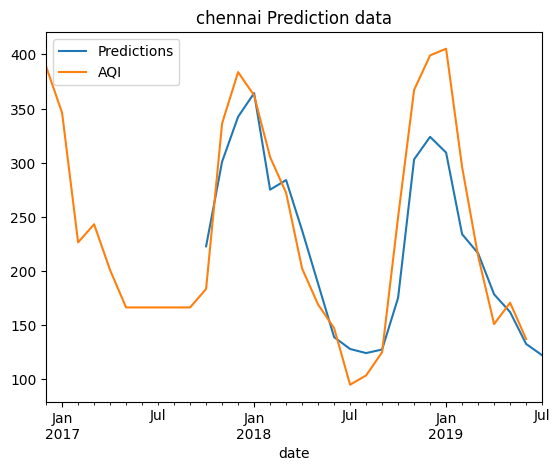

In [39]:
predictions = results.predict(start=33, end=54, typ='levels').rename('Predictions')
predictions.plot(legend=True)
test.plot(legend=True,title="chennai Prediction data")

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error,mean_poisson_deviance,mean_gamma_deviance
import math
import numpy as np
RMSE=np.sqrt(mean_squared_error(predictions,test))
print('Root Mean Squared Error: ', RMSE)
print('Mean AQI:',test.mean())
forecast_errors = [test[i]-predictions[i] for i in range(len(test))]
bias = sum(forecast_errors) * 1.0/len(test)
print('Bias: %f' % bias)
mse = mean_squared_error(test, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(test, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test, predictions))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(predictions - test)/np.abs(test))
print('MAPE: '+str(mape))
r2score=r2_score(test, predictions)
print('r2score: '+str(r2score))
explainedVariance_score=explained_variance_score(test, predictions)
print('explainedVariance_score: '+str(explainedVariance_score))
me=max_error(test, predictions)
print('me: '+str(me))
mpd=mean_poisson_deviance(test, predictions)
print('mpd: '+str(mpd))
mgd=mean_gamma_deviance(test, predictions)
print('mgd: '+str(mgd))

ValueError: Found input variables with inconsistent numbers of samples: [22, 12]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


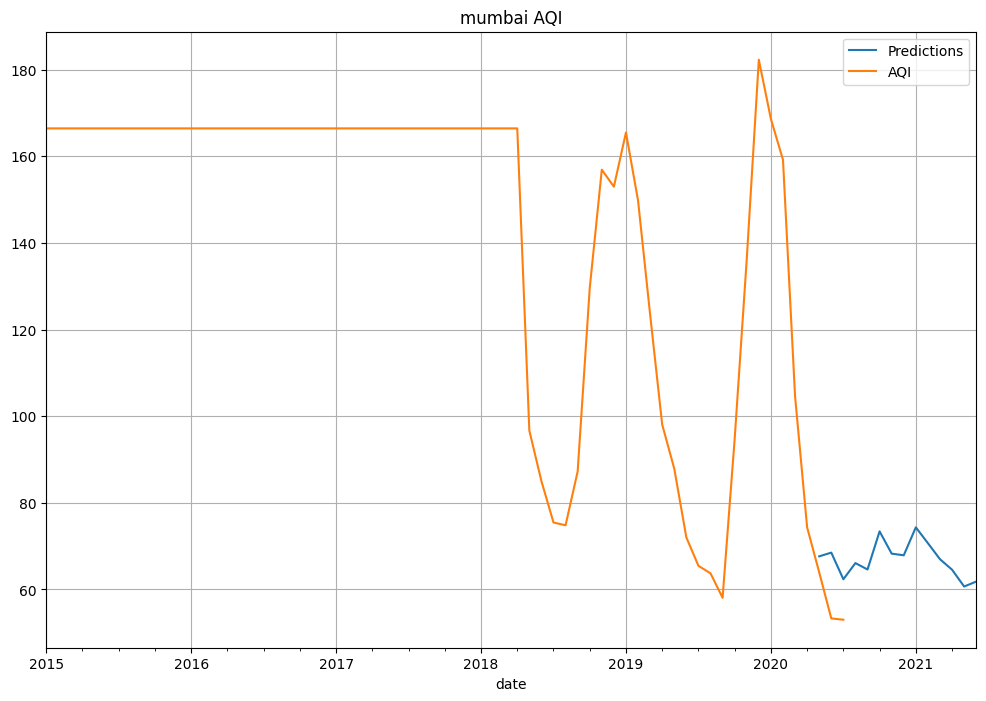

In [24]:
# Forming the model:
final_model = SARIMAX(train,order=(1,0,0),seasonal_order=(1,0,1,12))
results = final_model.fit()
#Obtaining predicted values:
predictions = results.predict(start=64, end=77, typ='levels').rename('Predictions')
#Plotting predicted values against the true values:
predictions.plot(legend=True)
m_AQI.plot(legend=True,figsize=(12,8),grid=True,title="mumbai AQI");